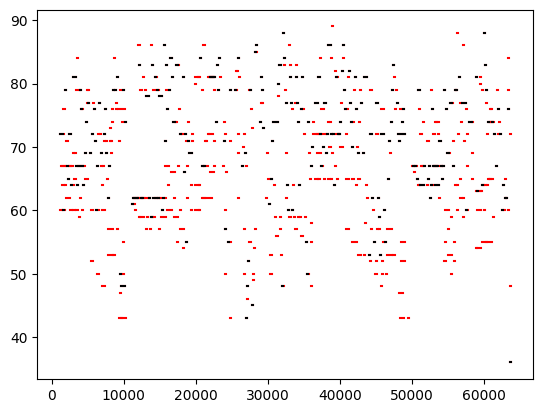

In [1]:
import mido
import matplotlib.pyplot as plt


def read_midi(file_path):
    # C5 is the 72nd note in the MIDI standard
    # 240 is quarter note at 120 bpm
    notes: list[tuple[int, int, int]] = []
    # Open the MIDI file
    with mido.MidiFile(file_path) as midi_file:
        # Iterate over each track in the MIDI file
        for i, track in enumerate(midi_file.tracks):
            # print(f"Track {i}:")
            
            # Initialize variables to keep track of note start times
            current_time = 0
            note_start_times = {}
            
            # Iterate over each message in the track
            for msg in track:
                # Update current time based on the message time
                current_time += msg.time
                
                # If it's a note-on message, store the note and its start time
                if msg.type == 'note_on' and msg.velocity != 0:
                    note_start_times[msg.note] = current_time
                
                # If it's a note-off message, calculate the duration and print the note
                elif msg.type == 'note_off' or (msg.type == 'note_on' and msg.velocity == 0):
                    note = msg.note
                    start_time = note_start_times.pop(note, None)
                    if start_time is not None:
                        # duration = current_time - start_time
                        # print(f"Note {note} at time {start_time}, duration {duration}")
                        plt.plot([start_time, current_time], [note, note], 'r-')
                        notes.append((start_time, current_time, note))
    return notes                

# Provide the path to your MIDI file
midi_file_path = "545.mid"
notes: list[tuple[int, int, int]] = read_midi(midi_file_path)
# plt.show()

# change notes so only one note is played at a time, the highest note is played
notes.sort(key=lambda x: x[0])
new_notes = []
new_notes.append(notes.pop(0))
for note in notes:
    if note[0] < new_notes[-1][1]:
        if note[2] > new_notes[-1][2]:
            new_notes[-1] = (new_notes[-1][0], note[0], new_notes[-1][2])
    else:
        new_notes.append(note)
notes = new_notes

for note in notes:
    plt.plot([note[0], note[1]], [note[2], note[2]], 'k-')


    

In [ ]:
d = 2**(1/12)
n = 16.351597831287414
c = 12
for o in range(9):
    for t in ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "H"]:
        print(f"{c:>2} {t+chr(8320+o):3} {n:.02f} Hz")
        n *= d
        c += 1




In [4]:
halftimes: dict[int, float] = {
    119: 63.27405669,
}
for n in range(118, 11, -1):
    halftimes[n] = halftimes[n + 1] * 2 ** (1 / 12)

rtimes: dict[int, tuple[int, int]] = {}
for n, ht in halftimes.items():
    d, m = divmod(ht, 256)
    rtimes[n] = (int(d), int(m))
rtimes

{119: (0, 63),
 118: (0, 67),
 117: (0, 71),
 116: (0, 75),
 115: (0, 79),
 114: (0, 84),
 113: (0, 89),
 112: (0, 94),
 111: (0, 100),
 110: (0, 106),
 109: (0, 112),
 108: (0, 119),
 107: (0, 126),
 106: (0, 134),
 105: (0, 142),
 104: (0, 150),
 103: (0, 159),
 102: (0, 168),
 101: (0, 178),
 100: (0, 189),
 99: (0, 200),
 98: (0, 212),
 97: (0, 225),
 96: (0, 238),
 95: (0, 253),
 94: (1, 12),
 93: (1, 28),
 92: (1, 44),
 91: (1, 62),
 90: (1, 81),
 89: (1, 101),
 88: (1, 123),
 87: (1, 145),
 86: (1, 169),
 85: (1, 194),
 84: (1, 221),
 83: (1, 250),
 82: (2, 24),
 81: (2, 56),
 80: (2, 89),
 79: (2, 125),
 78: (2, 163),
 77: (2, 203),
 76: (2, 246),
 75: (3, 35),
 74: (3, 83),
 73: (3, 133),
 72: (3, 187),
 71: (3, 244),
 70: (4, 48),
 69: (4, 112),
 68: (4, 179),
 67: (4, 251),
 66: (5, 71),
 65: (5, 151),
 64: (5, 236),
 63: (6, 71),
 62: (6, 166),
 61: (7, 11),
 60: (7, 119),
 59: (7, 232),
 58: (8, 97),
 57: (8, 224),
 56: (9, 103),
 55: (9, 247),
 54: (10, 142),
 53: (11, 47